In [66]:
import os
import torchaudio
import opensmile
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

/Users/tunji/projects/unidlorraine/m2/nn_speech_recognition/signal processing/speech_biomarkers/audio_example.wav
Shape of waveform: torch.Size([1, 528362])
Sample rate of waveform: 44100


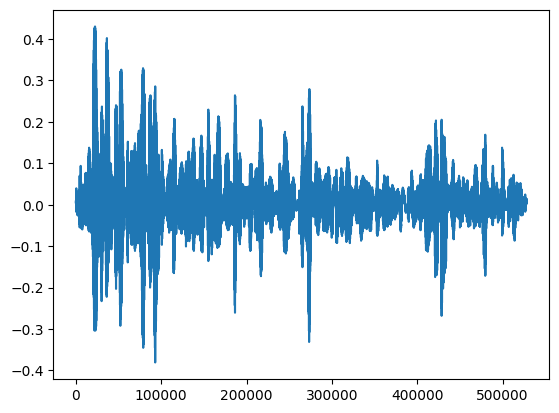

In [67]:
# load file

filename = os.path.join(os.getcwd(), "audio_example.wav")

print(filename)

waveform, sample_rate = torchaudio.load(filename)

# display waveform
print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

# plot waveform
plt.figure()
plt.plot(waveform.t().numpy())
plt.show()


In [68]:
# ComParE_2016 feature set
smile_ComParE_2016 = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)

features = smile_ComParE_2016.process_signal(waveform.numpy(), sample_rate)

print(f"There are {len(smile_ComParE_2016.feature_names)} features in ComParE_2016")

print(f"First 5 features: {smile_ComParE_2016.feature_names[:5]}")


There are 6373 features in ComParE_2016
First 5 features: ['audspec_lengthL1norm_sma_range', 'audspec_lengthL1norm_sma_maxPos', 'audspec_lengthL1norm_sma_minPos', 'audspec_lengthL1norm_sma_quartile1', 'audspec_lengthL1norm_sma_quartile2']


In [69]:
# eGeMAPSv02 feature set
smile_eGeMAPSv02 = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# eGeMAPSv02
features = smile_eGeMAPSv02.process_signal(waveform.numpy(), sample_rate)

print(f"There are {len(smile_eGeMAPSv02.feature_names)} features in eGeMAPSv02")
print(f"First 5 features: {smile_eGeMAPSv02.feature_names[:5]}")

There are 88 features in eGeMAPSv02
First 5 features: ['F0semitoneFrom27.5Hz_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0']


In [70]:
# Comment: Yes the features in each feature set are interpretable.

In [71]:
# Clasification Pipeline
interview_path = os.path.join(os.getcwd(), "interview")

print(interview_path)
# Load Dataframe from txt file
original_interview = pd.read_csv(f"{interview_path}/original_features_itw.txt", sep=" ")
original_interview.head()


/Users/tunji/projects/unidlorraine/m2/nn_speech_recognition/signal processing/speech_biomarkers/interview


,file,pcm_RMSenergy_sma,pcm_fftMag_mfcc_sma[1],pcm_fftMag_mfcc_sma[2],pcm_fftMag_mfcc_sma[3],pcm_fftMag_mfcc_sma[4],pcm_fftMag_mfcc_sma[5],pcm_fftMag_mfcc_sma[6],pcm_fftMag_mfcc_sma[7],pcm_fftMag_mfcc_sma[8],...,pcm_fftMag_mfcc_sma_de[6],pcm_fftMag_mfcc_sma_de[7],pcm_fftMag_mfcc_sma_de[8],pcm_fftMag_mfcc_sma_de[9],pcm_fftMag_mfcc_sma_de[10],pcm_fftMag_mfcc_sma_de[11],pcm_fftMag_mfcc_sma_de[12],pcm_zcr_sma_de,F0final_sma_de,voicingFinalUnclipped_sma_de
0,01_CF56_1_9.wav,0.001641,-7.993147,3.622742,-3.609813,-1.157714,-4.436824,-1.565266,2.353056,0.995174,...,0.001386,-0.000467,-0.000250,0.000511,0.001929,0.000452,-0.000174,0.000006,-1.397865e-08,-0.000141
1,01_PM58_2_7.wav,0.001269,-3.414622,-0.510539,-5.003965,-5.238570,-2.562080,-2.842674,-8.542736,4.873665,...,0.000336,-0.000555,-0.001534,-0.000678,0.000988,0.000225,-0.001542,-0.000007,4.029102e-08,-0.000007
2,02_CM57_2_9.wav,0.001852,-7.785583,4.902692,2.554034,2.866893,-1.795124,0.339846,1.415565,-1.217167,...,0.001290,-0.000698,0.004017,0.001493,-0.000130,0.000408,0.001911,0.000027,8.732312e-09,-0.000241
3,02_PM65_2_5.wav,0.001767,-4.010207,3.340752,-5.755154,3.622409,-0.973721,-1.777463,-0.249357,2.992307,...,0.001524,0.001180,0.000402,0.000227,-0.000218,-0.000279,0.000548,-0.000002,-7.958634e-09,-0.000033
4,03_CF30_3_9.wav,0.002354,-10.275271,1.169264,-6.348527,-5.145951,-3.981039,-0.528490,-1.144352,-1.672452,...,0.007634,0.007079,0.002377,-0.001608,-0.003619,0.004577,-0.000300,0.000018,-8.120164e-02,-0.000395


In [72]:
reading_path = os.path.join(os.getcwd(), "reading")

print(reading_path)

# Load Dataframe from txt file
original_reading = pd.read_csv(f"{reading_path}/original_features_reading.txt", sep=" ")
original_reading.head()

/Users/tunji/projects/unidlorraine/m2/nn_speech_recognition/signal processing/speech_biomarkers/reading


,file,pcm_RMSenergy_sma,pcm_fftMag_mfcc_sma[1],pcm_fftMag_mfcc_sma[2],pcm_fftMag_mfcc_sma[3],pcm_fftMag_mfcc_sma[4],pcm_fftMag_mfcc_sma[5],pcm_fftMag_mfcc_sma[6],pcm_fftMag_mfcc_sma[7],pcm_fftMag_mfcc_sma[8],...,pcm_fftMag_mfcc_sma_de[6],pcm_fftMag_mfcc_sma_de[7],pcm_fftMag_mfcc_sma_de[8],pcm_fftMag_mfcc_sma_de[9],pcm_fftMag_mfcc_sma_de[10],pcm_fftMag_mfcc_sma_de[11],pcm_fftMag_mfcc_sma_de[12],pcm_zcr_sma_de,F0final_sma_de,voicingFinalUnclipped_sma_de
0,01_CF56_1.wav,0.002261,-8.270611,4.245777,-2.214785,-1.099953,-5.414038,-1.643054,4.394672,-4.014774,...,0.001822,0.000631,0.002062,0.000118,0.000293,0.001997,0.000612,-0.000010,2.608941e-09,-7.959868e-05
1,02_CM57_2.wav,0.002681,-8.864588,3.409123,2.830361,0.558934,-5.179539,0.095285,1.319953,-2.879246,...,0.000874,0.000054,-0.000924,-0.000141,0.000109,0.000578,0.000090,0.000003,-2.698812e-10,-6.611810e-06
2,03_CF30_3.wav,0.003321,-10.029313,1.707512,-2.355538,-2.879610,-8.594481,1.469407,0.151268,-1.292424,...,0.000476,-0.000424,0.000488,0.000290,-0.001120,-0.001321,0.000400,-0.000011,-2.096455e-08,-1.496377e-11
3,04_CF57_3.wav,0.004056,-7.622425,0.151571,-4.853669,-3.816431,-7.061374,-8.041776,1.054435,1.714545,...,-0.000313,0.000972,-0.000865,-0.000738,-0.000729,0.000404,0.000252,0.000027,4.707676e-08,-3.531171e-10
4,05_CF41_3.wav,0.003208,-7.090667,3.914243,-3.733362,-9.173938,-5.444164,-4.986966,3.087502,-6.511266,...,0.001883,-0.000348,0.001210,0.002588,0.001315,0.000953,0.000456,-0.000020,-2.072787e-08,4.304767e-10


In [73]:
def extract_class_from_file_col(file_col):
    return file_col.split("_")[1][0]

original_interview["label"] =  original_interview.apply(lambda row: extract_class_from_file_col(row["file"]), axis=1)
original_interview.head()

# Count the number of samples in each class for the interview dataset
original_interview["label"].value_counts()
print(original_interview["label"].value_counts())

label
P    64
C    52
Name: count, dtype: int64


In [74]:
original_reading["label"] =  original_reading.apply(lambda row: extract_class_from_file_col(row["file"]), axis=1)
original_reading.head()

# Count the number of samples in each class for the reading dataset
original_reading["label"].value_counts()
print(original_reading["label"].value_counts())

label
P    58
C    54
Name: count, dtype: int64


In [86]:
# Split the data into training and testing sets
X = original_interview.drop(["file", "label"], axis=1)

y = original_interview["label"]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

balanced_accuracy_scores = []
accuracy_scores = []
f1_scores = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    clf = SVC(kernel="rbf", C=1, class_weight="balanced")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    balanced_accuracy_scores.append(balanced_accuracy_score(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average="weighted"))

print(f"Mean balanced accuracy: {sum(balanced_accuracy_scores) / len(balanced_accuracy_scores)}")
print(f"Standard deviation of balanced accuracies: {pd.Series(balanced_accuracy_scores).std()}")
print(f"Mean accuracy: {sum(accuracy_scores) / len(accuracy_scores)}")
print(f"Mean f1 score: {sum(f1_scores) / len(f1_scores)}")

Mean balanced accuracy: 0.6935081585081585
Standard deviation of balanced accuracies: 0.04724899175620272
Mean accuracy: 0.6891304347826087
Mean f1 score: 0.686868928173276


In [85]:
# Split the data into training and testing sets
X = original_reading.drop(["file", "label"], axis=1)

y = original_reading["label"]

# Use stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5)

balanced_accuracies = []
mean_accuracies = []
f1_scores = []

# Get test, train splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Train a Support Vector Machine (SVM) classifier
    clf = SVC(kernel="rbf", C=1, class_weight="balanced")
    clf.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = clf.predict(X_test)

    # Compute the balanced accuracy
    balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
    mean_accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average="weighted"))

print(f"Mean balanced accuracy: {sum(balanced_accuracies) / len(balanced_accuracies)}")
print(f"Standard deviation of balanced accuracies: {pd.Series(balanced_accuracies).std()}")
print(f"Mean accuracy: {sum(mean_accuracies) / len(mean_accuracies)}")
print(f"Mean f1 score: {sum(f1_scores) / len(f1_scores)}")

Mean balanced accuracy: 0.67
Standard deviation of balanced accuracies: 0.070078009791817
Mean accuracy: 0.6699604743083004
Mean f1 score: 0.6641909027392942
